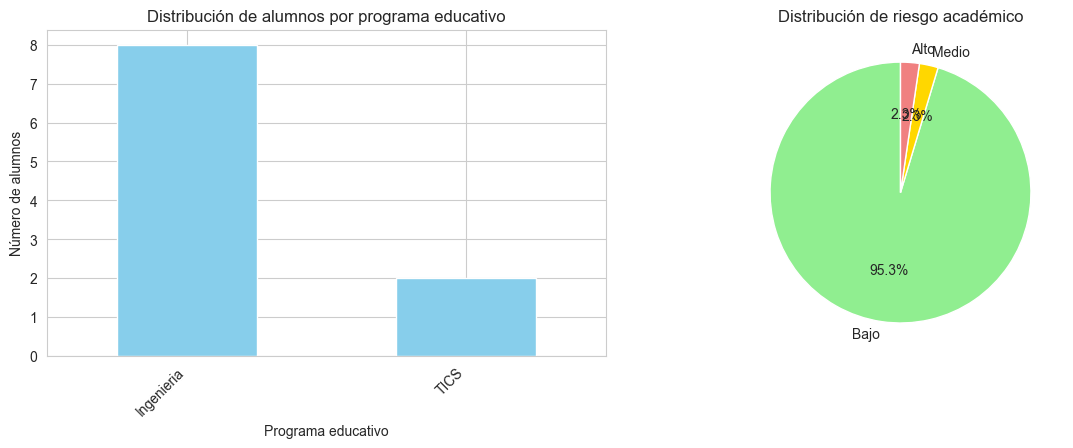


Reporte de riesgo por programa educativo (cantidad):
riesgo              Bajo
programa_educativo      
TICS                   4

Reporte de riesgo por programa educativo (porcentaje):
riesgo               Bajo
programa_educativo       
TICS                100.0


<Figure size 1200x600 with 0 Axes>

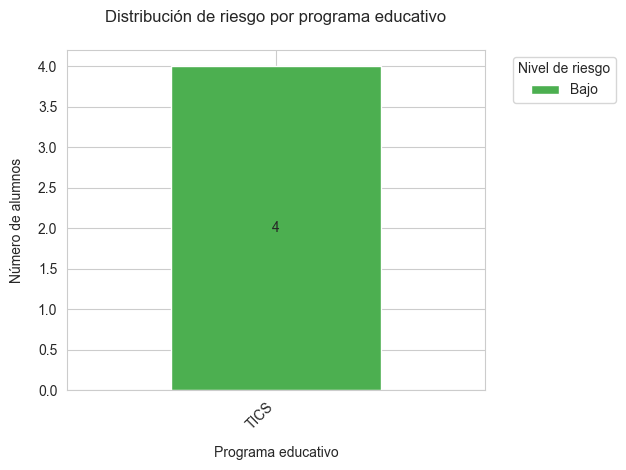

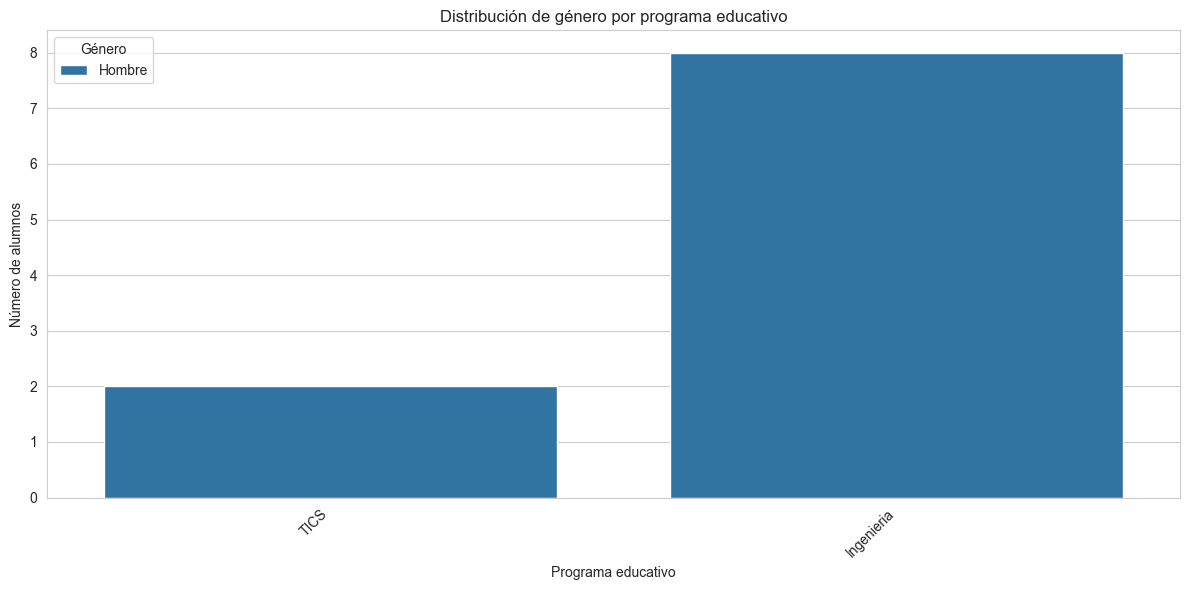

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
alumnos = pd.read_csv('csv/alumnos.csv')
predicciones = pd.read_csv('csv/predicciones.csv')

# Preprocesamiento de datos
# Limpiar y convertir id_alumno a string en ambos DataFrames
alumnos['id_alumno'] = alumnos['id_alumno'].astype(str)
predicciones['id_alumno'] = predicciones['id_alumno'].astype(str)

# Filtrar solo predicciones con id_alumno válido
predicciones = predicciones[predicciones['id_alumno'].notna() & (predicciones['id_alumno'] != '')]

# Configurar estilo
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Visualización 1: Distribución de alumnos por programa educativo
plt.subplot(2, 2, 1)
if 'programa_educativo' in alumnos.columns:
    programa_counts = alumnos['programa_educativo'].value_counts()
    programa_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribución de alumnos por programa educativo')
    plt.xlabel('Programa educativo')
    plt.ylabel('Número de alumnos')
    plt.xticks(rotation=45, ha='right')

# Visualización 2: Distribución de riesgo académico
plt.subplot(2, 2, 2)
if 'riesgo' in predicciones.columns:
    riesgo_counts = predicciones['riesgo'].value_counts()
    riesgo_counts.plot(kind='pie', autopct='%1.1f%%', 
                     colors=['lightgreen', 'gold', 'lightcoral'],
                     startangle=90)
    plt.title('Distribución de riesgo académico')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Función mejorada para reporte de riesgo por programa
def reporte_riesgo_programa(predicciones, alumnos):
    try:
        # Verificar columnas requeridas
        required_cols = ['id_alumno', 'programa_educativo', 'riesgo']
        if not all(col in alumnos.columns for col in ['id_alumno', 'programa_educativo']):
            print("Error: Faltan columnas requeridas en alumnos")
            return None, None
        if 'id_alumno' not in predicciones.columns or 'riesgo' not in predicciones.columns:
            print("Error: Faltan columnas requeridas en predicciones")
            return None, None
        
        # Hacer merge
        merged = pd.merge(
            predicciones[['id_alumno', 'riesgo']],
            alumnos[['id_alumno', 'programa_educativo']],
            on='id_alumno',
            how='inner'
        )
        
        if merged.empty:
            print("Advertencia: No hay coincidencias entre los datasets")
            return None, None
        
        # Crear reporte
        reporte = merged.groupby(['programa_educativo', 'riesgo']).size().unstack().fillna(0)
        reporte_percent = reporte.div(reporte.sum(axis=1), axis=0) * 100
        
        return reporte, reporte_percent
    
    except Exception as e:
        print(f"Error al generar reporte: {str(e)}")
        return None, None

# Generar reporte
reporte_cant, reporte_pct = reporte_riesgo_programa(predicciones, alumnos)

if reporte_cant is not None:
    print("\nReporte de riesgo por programa educativo (cantidad):")
    print(reporte_cant)
    
    print("\nReporte de riesgo por programa educativo (porcentaje):")
    print(reporte_pct.round(1))
    
    # Visualización del reporte
    plt.figure(figsize=(12, 6))
    ax = reporte_cant.plot(kind='bar', stacked=True, 
                         color=['#4CAF50', '#FFC107', '#F44336'])
    plt.title('Distribución de riesgo por programa educativo', pad=20)
    plt.xlabel('Programa educativo', labelpad=10)
    plt.ylabel('Número de alumnos', labelpad=10)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Nivel de riesgo', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Agregar etiquetas de valores
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.0f')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se pudo generar el reporte. Verifica los datos.")

# Análisis adicional: Distribución de género si está disponible
if 'genero' in alumnos.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=alumnos, x='programa_educativo', hue='genero')
    plt.title('Distribución de género por programa educativo')
    plt.xlabel('Programa educativo')
    plt.ylabel('Número de alumnos')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Género')
    plt.tight_layout()
    plt.show()